In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_df = pd.read_csv('/content/Customer Satisfaction.csv')

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        103904 non-null  int64  
 1   Gender                    103904 non-null  object 
 2   Age                       103904 non-null  int64  
 3   Travel Category           103904 non-null  object 
 4   Travel Class              97621 non-null   object 
 5   Distance Travelled        103904 non-null  int64  
 6   Departure/Arrival Rating  91734 non-null   float64
 7   Booking Ease              91755 non-null   float64
 8   Boarding Point            94695 non-null   float64
 9   Food                      89946 non-null   float64
 10  Seat Comfort              93768 non-null   float64
 11  Entertainment             95673 non-null   float64
 12  Leg Room                  88632 non-null   float64
 13  Luggage Handling          95651 non-null   f

In [ ]:
customer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Distance Travelled,103904.0,950.598755,911.716794,0.0,275.00,623.0,1431.00,4485.0
Departure/Arrival Rating,91734.0,3.061733,1.526525,0.0,2.00,3.0,4.00,5.0
Booking Ease,91755.0,2.756286,1.398770,0.0,2.00,3.0,4.00,5.0
Boarding Point,94695.0,2.976778,1.277205,0.0,2.00,3.0,4.00,5.0
Food,89946.0,3.203467,1.328543,0.0,2.00,3.0,4.00,5.0
Seat Comfort,93768.0,3.439276,1.319259,0.0,2.00,4.0,5.00,5.0
Entertainment,95673.0,3.357509,1.333193,0.0,2.00,4.0,4.00,5.0
Leg Room,88632.0,3.351566,1.316879,0.0,2.00,4.0,4.00,5.0


In [ ]:
customer_df.head()

,id,Gender,Age,Travel Category,Travel Class,Distance Travelled,Departure/Arrival Rating,Booking Ease,Boarding Point,Food,Seat Comfort,Entertainment,Leg Room,Luggage Handling,Cleanliness,Departure Delay (min),Arrival Delay (min),Satisfaction
0,70172,Male,13,Personal Travel,Premium,414,4.0,3.0,1.0,5.0,5.0,5.0,NaN,4.0,5,25,18.0,dissatisfied
1,5047,Male,25,Official,Business,212,2.0,3.0,3.0,1.0,NaN,1.0,5.0,3.0,1,1,6.0,dissatisfied
2,110028,Female,26,Official,Business,1028,2.0,2.0,2.0,5.0,5.0,5.0,3.0,4.0,5,0,0.0,satisfied
3,24026,Female,25,Official,Business,506,5.0,5.0,5.0,NaN,2.0,2.0,5.0,3.0,2,11,9.0,dissatisfied
4,119299,Male,61,Official,Business,193,3.0,3.0,3.0,NaN,5.0,3.0,4.0,4.0,3,0,0.0,satisfied


*Descriptive Statistics Question*

*1. Gender Distribution*

*o What is the proportion of male to female travelersin the dataset?*

In [ ]:
customer_df['Gender'].value_counts()

,count
Gender,
Female,52727
Male,51177


<Axes: xlabel='Gender', ylabel='count'>

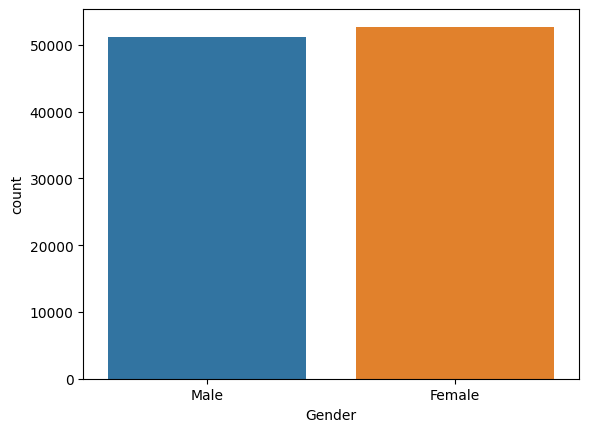

In [ ]:
sns.countplot(x=customer_df['Gender'],hue=customer_df['Gender'],legend=False)

*o How does gender relate to satisfaction levels?*


In [ ]:
customer_df.groupby(['Gender','Satisfaction'])['Satisfaction'].count()

Gender  Satisfaction
Female  dissatisfied    30193
        satisfied       22534
Male    dissatisfied    28686
        satisfied       22491
Name: Satisfaction, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

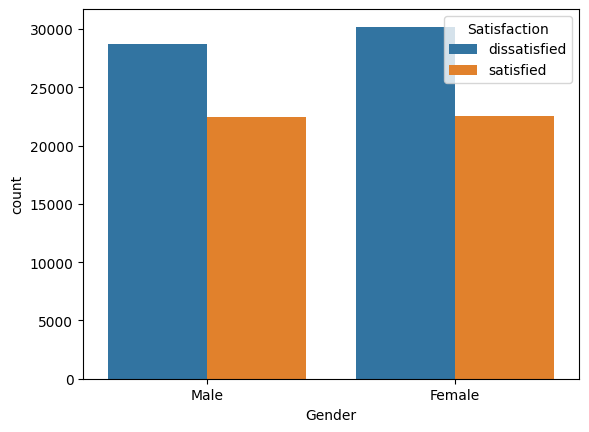

In [ ]:
sns.countplot(x='Gender',hue='Satisfaction',data=customer_df)

**The satsified count is almost same for both the genders and for the dissatisfied count the female is slightly on the higher side than male.**

*2. Age Analysis*

*o What is the average age of travelers in the dataset?*

In [ ]:
avg_age_traveller = customer_df['Age'].mean()
print(f'Average age of travellers : ',avg_age_traveller)

Average age of travellers :  39.379706267323684


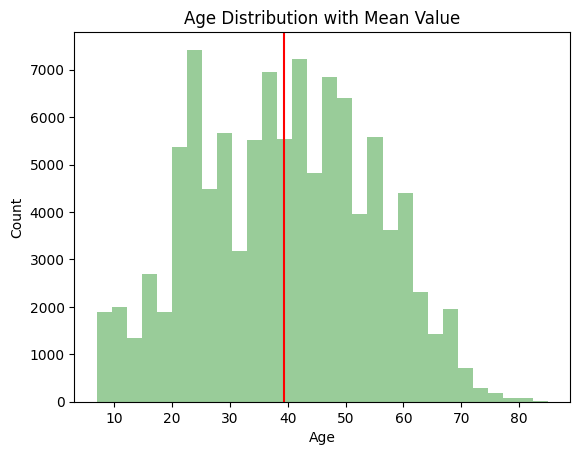

In [ ]:
plt.title('Age Distribution with Mean Value')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(customer_df['Age'],bins=30,alpha=0.4,color='green')
plt.axvline(avg_age_traveller, color='red')

*What is the age range of the travelers, and how many travelers fall within specific age
brackets (e.g., 18-30, 31-45, 46-60, 61+)?*

In [ ]:
bins=[0,18,30,45,60,85]
labels=['Below 18','18-30', '31-45', '46-60', '61+']

customer_df['Age Group']=pd.cut(customer_df['Age'],bins=bins,labels=labels)

In [ ]:
customer_df[['Age','Age Group']].head(10)

,Age,Age Group
0,13,Below 18
1,25,18-30
2,26,18-30
3,25,18-30
4,61,61+
5,26,18-30
6,47,46-60
7,52,46-60
8,41,31-45
9,20,18-30


In [ ]:
pd.DataFrame(customer_df['Age Group'].value_counts().sort_index(ascending=True))

,count
Age Group,
Below 18,8909
18-30,23848
31-45,33252
46-60,29919
61+,7976


<Axes: xlabel='Age Group', ylabel='count'>

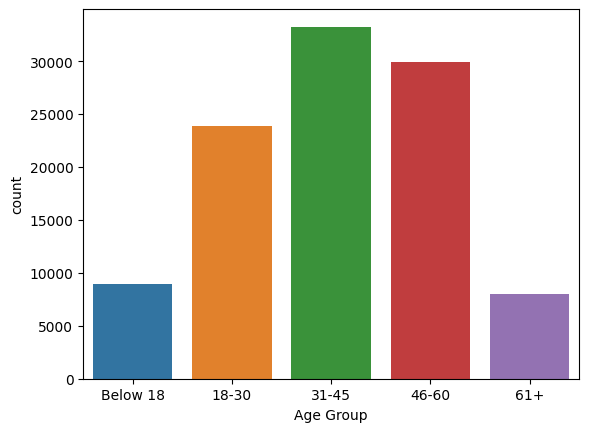

In [ ]:
sns.countplot(x=customer_df['Age Group'],hue=customer_df['Age Group'],legend=False)

*3. Travel Category*

*o How many travelers are classified under "Businesstravel" versus "Personal Travel"*

In [ ]:
customer_df['Travel Category'].value_counts()

,count
Travel Category,
Official,71655
Personal Travel,32249


<Axes: xlabel='Travel Category', ylabel='count'>

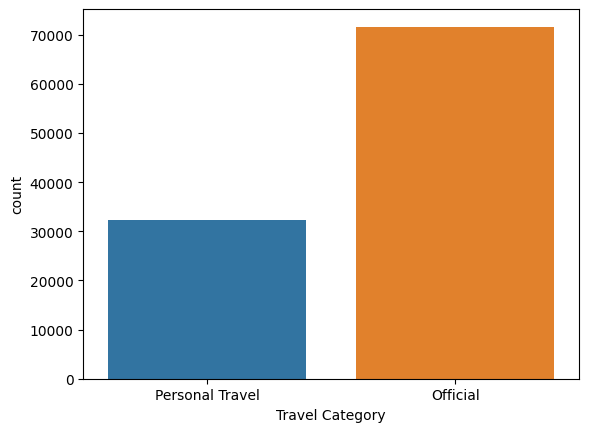

In [ ]:
sns.countplot(x=customer_df['Travel Category'],hue=customer_df['Travel Category'],legend=False)

*o What isthe average distance traveled by each travel category?*

In [ ]:
avg_distance = customer_df.groupby(['Travel Category'])['Distance Travelled'].mean()

In [ ]:
print(avg_distance)

Travel Category
Official           1093.241867
Personal Travel     633.655834
Name: Distance Travelled, dtype: float64


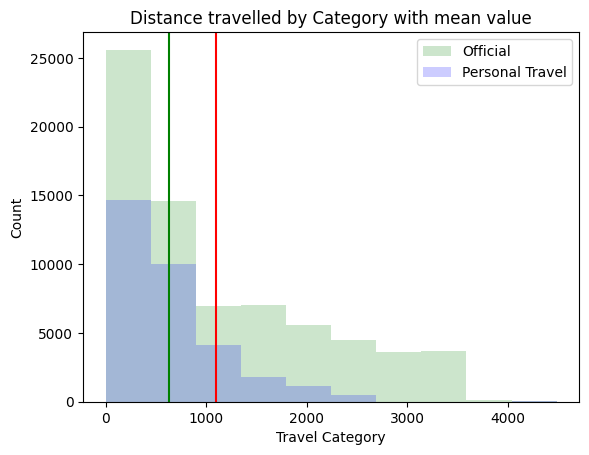

In [ ]:
avg_dist_official = avg_distance.iloc[0]
avg_dist_personal = avg_distance.iloc[1]
plt.title('Distance travelled by Category with mean value')
plt.xlabel('Travel Category')
plt.ylabel('Count')
plt.hist(customer_df[customer_df['Travel Category']=='Official']['Distance Travelled'],alpha = 0.2, color='green',label='Official')
plt.axvline(avg_dist_official,color='red')
plt.hist(customer_df[customer_df['Travel Category']=='Personal Travel']['Distance Travelled'],alpha = 0.2, color='blue',label='Personal Travel')
plt.axvline(avg_dist_personal,color='green')
plt.legend()

*4. Travel Class Ratings*

*o What is the average rating for seat comfort across different travel classes?*

In [ ]:
avg_seat_comfort = customer_df.groupby(['Travel Class'])['Seat Comfort'].mean()

In [ ]:
print(avg_seat_comfort)

Travel Class
Business    3.764678
Economy     3.136548
Premium     3.180770
Name: Seat Comfort, dtype: float64


<Axes: xlabel='Travel Class', ylabel='Seat Comfort'>

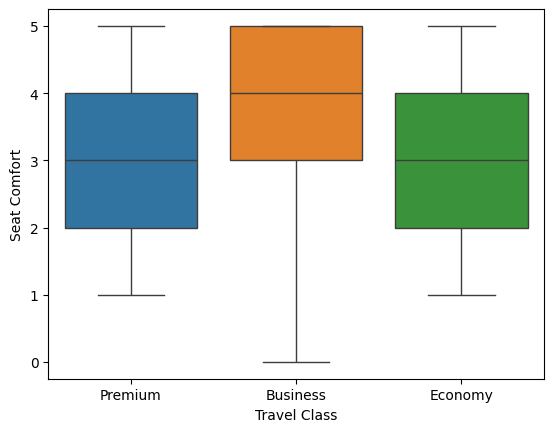

In [ ]:
sns.boxplot(x='Travel Class',y='Seat Comfort',data=customer_df,hue='Travel Class',legend=False)

*o How does the rating for food differ between "Business" and "Eco" classes?*

In [ ]:
avg_food = customer_df.groupby(['Travel Class'])['Food'].mean()

In [ ]:
print(avg_food)

Travel Class
Business    3.323518
Economy     3.086935
Premium     3.126841
Name: Food, dtype: float64


<Axes: xlabel='Travel Class', ylabel='Food'>

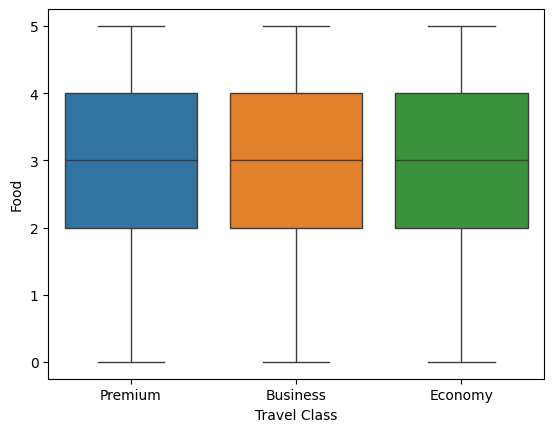

In [ ]:
sns.boxplot(x='Travel Class',y='Food',data=customer_df,hue='Travel Class',legend=False)

*5. Delay Analysis*

*o What isthe average departure delay and arrival delay for the dataset?*


In [ ]:
avg_dept_delay = customer_df['Departure Delay (min)'].mean()
avg_arr_delay = customer_df['Arrival Delay (min)'].mean()

print(f'Average departure delay',avg_dept_delay)
print(f'Average arrival delay',avg_arr_delay)

Average departure delay 14.815618263012011
Average arrival delay 15.178678301832152


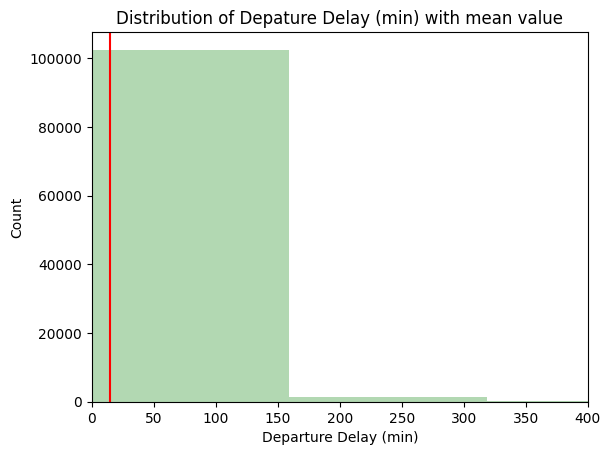

In [ ]:
plt.xlim(0,400)
plt.xlabel('Departure Delay (min)')
plt.ylabel('Count')
plt.title('Distribution of Depature Delay (min) with mean value')
plt.hist(customer_df['Departure Delay (min)'],alpha=0.3,color='green')
plt.axvline(avg_dept_delay, color='red')

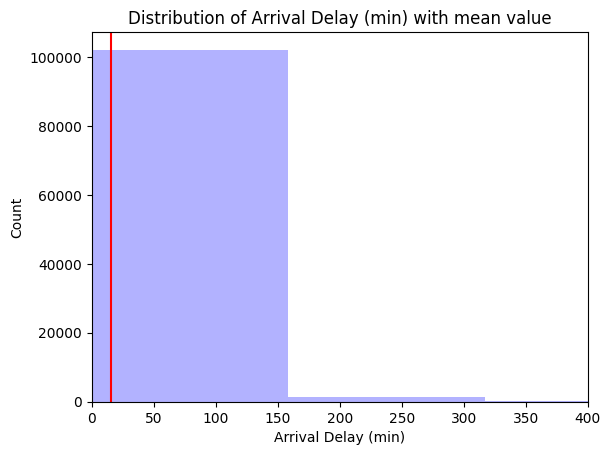

In [ ]:
plt.xlim(0,400)
plt.xlabel('Arrival Delay (min)')
plt.ylabel('Count')
plt.title('Distribution of Arrival Delay (min) with mean value')
plt.hist(customer_df['Arrival Delay (min)'],alpha=0.3,color='blue')
plt.axvline(avg_arr_delay, color='red')

*o How do delays(both departure and arrival) impact customer satisfaction?*

In [ ]:
customer_df['Num Satisfaction']=customer_df['Satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [ ]:
customer_df['Num Satisfaction'].value_counts()

,count
Num Satisfaction,
0,58879
1,45025


In [ ]:
customer_df['Satisfaction'].value_counts()

,count
Satisfaction,
dissatisfied,58879
satisfied,45025


In [ ]:
customer_df.columns

Index(['id', 'Gender', 'Age', 'Travel Category', 'Travel Class',
       'Distance Travelled', 'Departure/Arrival Rating', 'Booking Ease',
       'Boarding Point', 'Food', 'Seat Comfort', 'Entertainment', 'Leg Room',
       'Luggage Handling', 'Cleanliness', 'Departure Delay (min)',
       'Arrival Delay (min)', 'Satisfaction', 'Age Group', 'Num Satisfaction'],
      dtype='object')

In [ ]:
df_for_corr = customer_df[['Departure Delay (min)','Arrival Delay (min)','Num Satisfaction']].corr()

<Axes: >

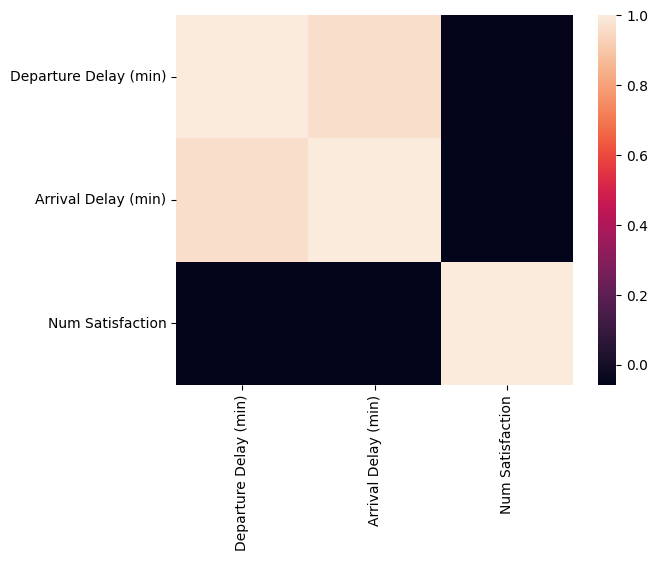

In [ ]:
sns.heatmap(df_for_corr)

In [ ]:
df_for_corr

,Departure Delay (min),Arrival Delay (min),Num Satisfaction
Departure Delay (min),1.000000,0.965481,-0.050494
Arrival Delay (min),0.965481,1.000000,-0.057582
Num Satisfaction,-0.050494,-0.057582,1.000000


<Axes: ylabel='Num Satisfaction'>

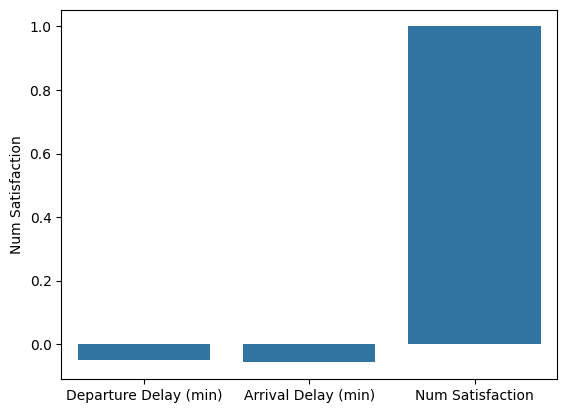

In [ ]:
sns.barplot(df_for_corr['Num Satisfaction'])

**Both the fields are having -ve correlation on the customer satisfaction, if the delay value decreases the customer will be satisfied or vice-versa**


*Model Building*
*1. Data Cleaning*

*o Handle missing values.*

<Axes: >

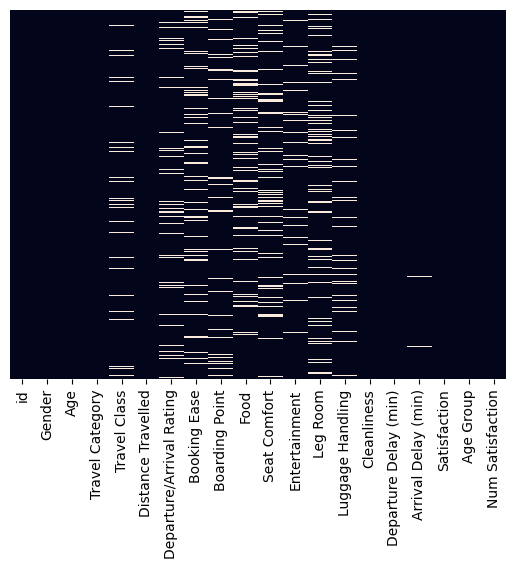

In [ ]:
sns.heatmap(customer_df.isnull(),yticklabels=False,cbar=False)

**'Departure/Arrival Rating',**
**'Booking Ease',**
**'Boarding Point',**
**'Food',**
**'Seat Comfort',**
**'Entertainment',**
**'Leg Room',**
**'Luggage Handling' are having values as ratings from 1 - 5.**




**We can replace the null values with mean of the column so that** **the distribution is not changed for the dataset**

In [ ]:
mean_dept_arr_rating = customer_df['Departure/Arrival Rating'].mean()
mean_booking_ease = customer_df['Booking Ease'].mean()
mean_boarding_point = customer_df['Boarding Point'].mean()
mean_food = customer_df['Food'].mean()
mean_seat_comfort = customer_df['Seat Comfort'].mean()
mean_entertainment = customer_df['Entertainment'].mean()
mean_leg_room = customer_df['Leg Room'].mean()
mean_luggage_handling = customer_df['Luggage Handling'].mean()

In [ ]:
customer_df['Departure/Arrival Rating'] = customer_df['Departure/Arrival Rating'].apply(lambda x : mean_dept_arr_rating if pd.isnull(x) else x)
customer_df['Booking Ease'] = customer_df['Booking Ease'].apply(lambda x : mean_booking_ease if pd.isnull(x) else x)
customer_df['Boarding Point'] = customer_df['Boarding Point'].apply(lambda x : mean_boarding_point if pd.isnull(x) else x)
customer_df['Food'] = customer_df['Food'].apply(lambda x : mean_food if pd.isnull(x) else x)
customer_df['Seat Comfort'] = customer_df['Seat Comfort'].apply(lambda x : mean_seat_comfort if pd.isnull(x) else x)
customer_df['Entertainment'] = customer_df['Entertainment'].apply(lambda x : mean_entertainment if pd.isnull(x) else x)
customer_df['Leg Room'] = customer_df['Leg Room'].apply(lambda x : mean_leg_room if pd.isnull(x) else x)
customer_df['Luggage Handling'] = customer_df['Luggage Handling'].apply(lambda x : mean_luggage_handling if pd.isnull(x) else x)

<Axes: >

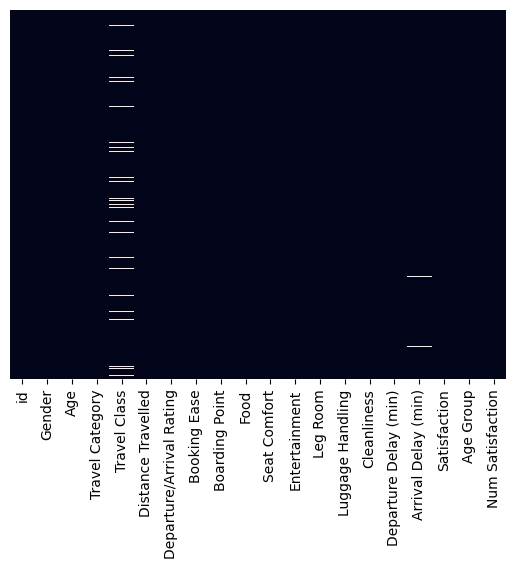

In [ ]:
sns.heatmap(customer_df.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Arrival Delay (min)', ylabel='Departure Delay (min)'>

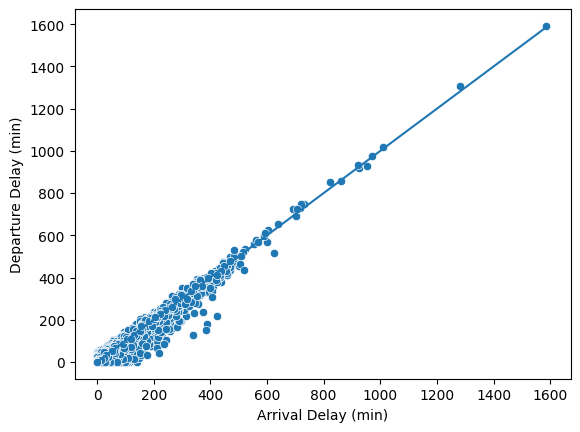

In [ ]:
sns.scatterplot(x=customer_df['Arrival Delay (min)'],y=customer_df['Departure Delay (min)'])
sns.lineplot(x=customer_df['Departure Delay (min)'],y=customer_df['Departure Delay (min)'])

**Field 'Arrival Delay(min)' is correlated strongly with 'Departure Delay(min)'.With the above graph it can be said that the both the fields are linearly related.
We can assign the same value of Depature Delay to Arrival Delay in case of null entries.**

In [ ]:
def assign_zero_arrival_delay(x,y):
  if pd.isnull(y):
    return(x)
  else:
    return(y)

In [ ]:
customer_df['Arrival Delay (min)']=customer_df.apply(lambda row: assign_zero_arrival_delay(row['Departure Delay (min)'],row['Arrival Delay (min)']), axis=1)

<Axes: >

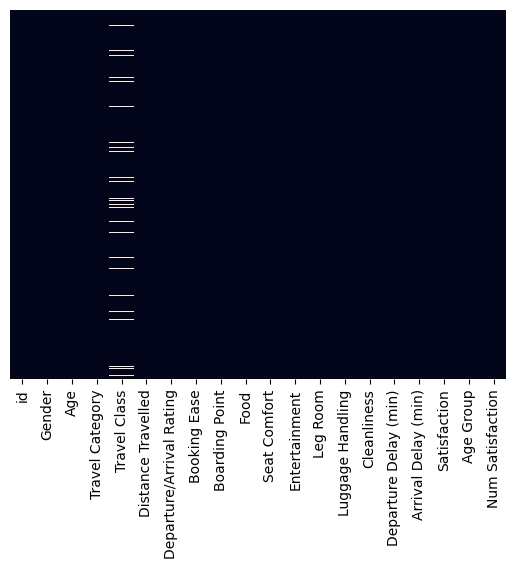

In [ ]:
sns.heatmap(customer_df.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Travel Class', ylabel='count'>

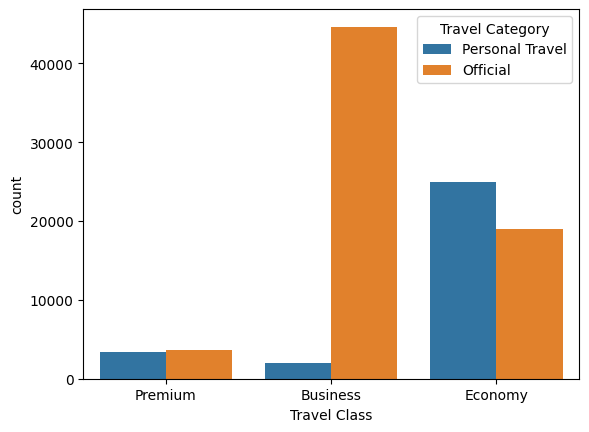

In [ ]:
sns.countplot(x='Travel Class',hue='Travel Category',data=customer_df)

**Field Travel Class and Travel Category are highly correlated and based on the above graph**

**We can assign the 'Travel Class' as *Business* if the 'Travel Category' is *Official* and as *Economy* if category is *Personal Travel***

In [ ]:
customer_df['Travel Class'].value_counts()

,count
Travel Class,
Business,46662
Economy,43926
Premium,7033


In [ ]:
customer_df['Travel Category'].value_counts()

,count
Travel Category,
Official,71655
Personal Travel,32249


In [ ]:
def assign_travel_class(x):
  if x == 'Official':
    return 'Business'
  else:
    return 'Economy'

In [ ]:
customer_df['Travel Class'].fillna(customer_df['Travel Category'].apply(assign_travel_class),inplace=True)

/tmp/ipython-input-447591714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df['Travel Class'].fillna(customer_df['Travel Category'].apply(assign_travel_class),inplace=True)


In [ ]:
customer_df['Travel Class'].value_counts()

,count
Travel Class,
Business,50993
Economy,45878
Premium,7033


<Axes: >

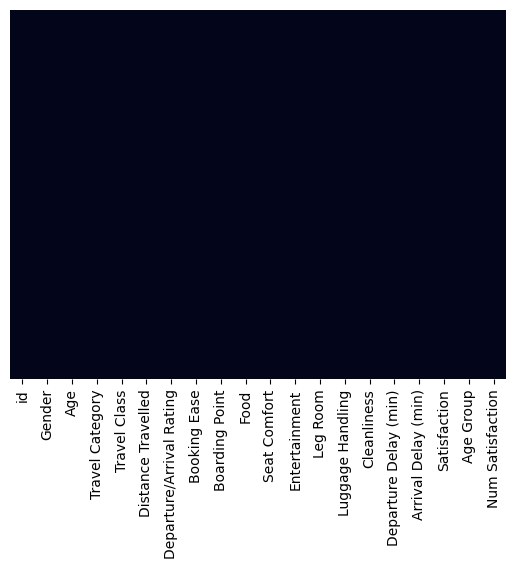

In [ ]:
sns.heatmap(customer_df.isnull(),yticklabels=False,cbar=False)

**All the null values are filled with appropiate values**

*o Ensure appropriate data typesfor analysis.*

In [ ]:
print(customer_df.dtypes)

id                             int64
Gender                        object
Age                            int64
Travel Category               object
Travel Class                  object
Distance Travelled             int64
Departure/Arrival Rating     float64
Booking Ease                 float64
Boarding Point               float64
Food                         float64
Seat Comfort                 float64
Entertainment                float64
Leg Room                     float64
Luggage Handling             float64
Cleanliness                    int64
Departure Delay (min)          int64
Arrival Delay (min)          float64
Satisfaction                  object
Age Group                   category
Num Satisfaction               int64
dtype: object


*Convert 'object' column to 'category'*

In [ ]:
object_columns = ['Gender', 'Travel Category', 'Travel Class']
customer_df[object_columns] = customer_df[object_columns].astype('category')


In [ ]:
print(customer_df.dtypes)

id                             int64
Gender                      category
Age                            int64
Travel Category             category
Travel Class                category
Distance Travelled             int64
Departure/Arrival Rating     float64
Booking Ease                 float64
Boarding Point               float64
Food                         float64
Seat Comfort                 float64
Entertainment                float64
Leg Room                     float64
Luggage Handling             float64
Cleanliness                    int64
Departure Delay (min)          int64
Arrival Delay (min)          float64
Satisfaction                  object
Age Group                   category
Num Satisfaction               int64
dtype: object


*o Handle Outliers- Remove them if % of outliers in a column is less than 5% else leave it*

<Axes: ylabel='Distance Travelled'>

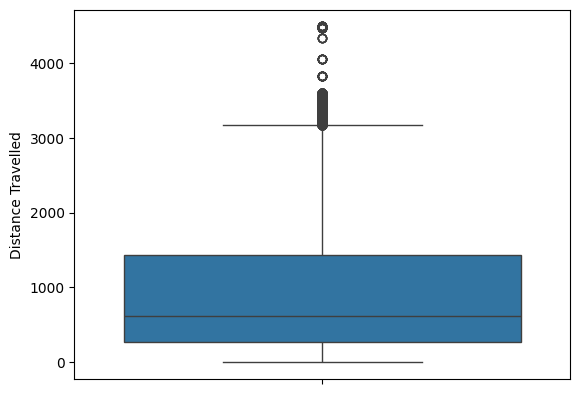

In [ ]:
sns.boxplot(data=customer_df,y='Distance Travelled')

**Looking the graph the outlier starts from 3800, so checking the percentage and if it is less than 5% of total value it is removed from dataframe.**

In [ ]:
customer_df[customer_df['Distance Travelled']>3800].shape

(54, 20)

**5% of total data is 5195, The 54 rows of outliers are very small compared to the total dataset so these can be removed from the dataset**

In [ ]:
customer_df.shape[0]*0.05

5195.200000000001

In [ ]:
customer_df = customer_df[customer_df['Distance Travelled']<=3800]

<Axes: ylabel='Distance Travelled'>

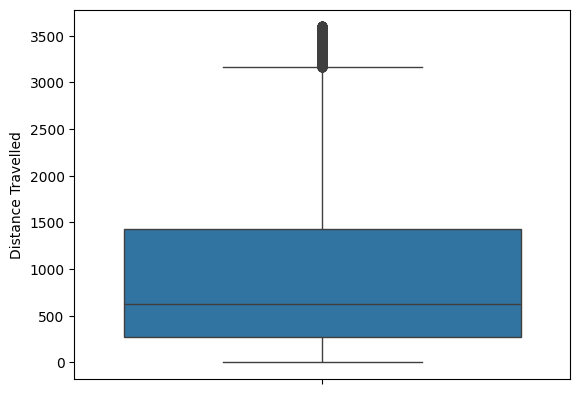

In [ ]:
sns.boxplot(data=customer_df,y='Distance Travelled')

*2. Data Preparation*

*Encode categorical variables into numerical format.*

In [ ]:
encoded_df = pd.get_dummies(customer_df[['Gender','Travel Class','Travel Category']],drop_first = True)

In [ ]:
customer_df = pd.concat([customer_df,encoded_df], axis=1)

In [ ]:
customer_df.columns

Index(['id', 'Gender', 'Age', 'Travel Category', 'Travel Class',
       'Distance Travelled', 'Departure/Arrival Rating', 'Booking Ease',
       'Boarding Point', 'Food', 'Seat Comfort', 'Entertainment', 'Leg Room',
       'Luggage Handling', 'Cleanliness', 'Departure Delay (min)',
       'Arrival Delay (min)', 'Satisfaction', 'Age Group', 'Num Satisfaction',
       'Gender_Male', 'Travel Class_Economy', 'Travel Class_Premium',
       'Travel Category_Personal Travel'],
      dtype='object')

*Split the dataset into features (X) and target variable (y).*

**Features 'id','Gender','Travel Category','Travel Class','Satisfaction','Age Group' can be dropped as Categorical are converted to numeric using get_dummies and 'id' is not related to the outcome of the model**

In [ ]:
X = customer_df.drop(['id','Gender','Travel Category','Travel Class','Satisfaction','Age Group','Num Satisfaction'],axis=1)
y= customer_df['Num Satisfaction']

3. Feature Engineering
*italicized text*

*o Create new features based on existing ones(e.g., total delay)*

In [ ]:
customer_df['Total Delay'] = customer_df['Departure Delay (min)'] + customer_df['Arrival Delay (min)']

In [ ]:
X['Total Delay'] = X['Departure Delay (min)'] + X['Arrival Delay (min)']

**As Total Delay is calculated, we can drop the other 2 columns 'Departure Delay (min)' and 'Arrival Delay (min)'**

In [ ]:
X=X.drop(['Departure Delay (min)','Arrival Delay (min)'],axis=1)

*o Scale numerical featuresif necessary.*

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103850.0,39.380183,15.114687,7.0,27.0,40.000000,51.0,85.0
Distance Travelled,103850.0,948.920780,908.955122,0.0,275.0,622.000000,1431.0,3600.0
Departure/Arrival Rating,103850.0,3.061810,1.434360,0.0,2.0,3.061733,4.0,5.0
Booking Ease,103850.0,2.756269,1.314431,0.0,2.0,2.756286,4.0,5.0
Boarding Point,103850.0,2.976719,1.219257,0.0,2.0,3.000000,4.0,5.0
Food,103850.0,3.203422,1.236107,0.0,2.0,3.203467,4.0,5.0
Seat Comfort,103850.0,3.439323,1.253225,0.0,3.0,4.000000,4.0,5.0
Entertainment,103850.0,3.357536,1.279384,0.0,2.0,3.357509,4.0,5.0
Leg Room,103850.0,3.351414,1.216334,0.0,3.0,3.351566,4.0,5.0
Luggage Handling,103850.0,3.632042,1.133416,1.0,3.0,4.000000,4.0,5.0


**There is big variation in the mean value across the fields, it is better to scale the data using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

*4. Exploratory Data Analysis(EDA)*

*o Visualise the distribution of the target variable.*

In [ ]:
y.value_counts()

,count
Num Satisfaction,
0,58855
1,44995


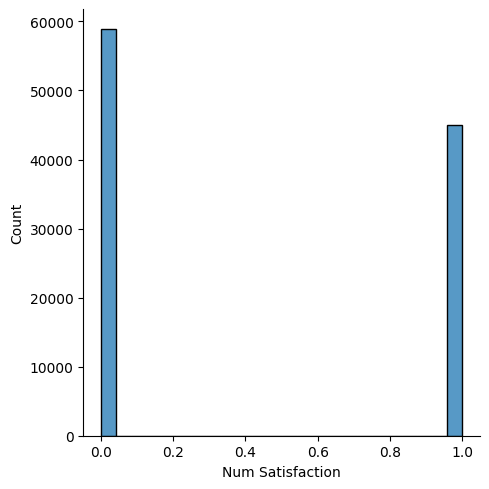

In [ ]:
sns.displot(y)


**The number of disatisfatied customers are more than the satisfied ones.**

*o Investigate correlations between features and satisfaction.*

In [ ]:
df_for_corr = customer_df.drop(['id','Gender','Travel Category','Travel Class','Satisfaction','Age Group','Departure Delay (min)','Arrival Delay (min)'],axis=1)
corr_values = df_for_corr.corr()

sorted_corr_for_satisfaction = corr_values['Num Satisfaction'].sort_values(ascending=False)

<Axes: >

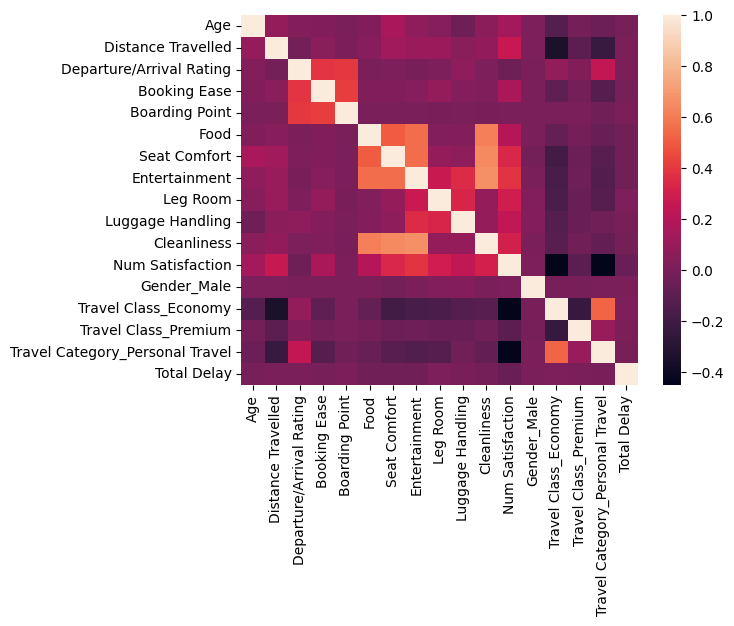

In [ ]:
sns.heatmap(corr_values)

In [ ]:
sorted_corr_for_satisfaction = sorted_corr_for_satisfaction.drop(labels=['Num Satisfaction'])

<Axes: ylabel='Num Satisfaction'>

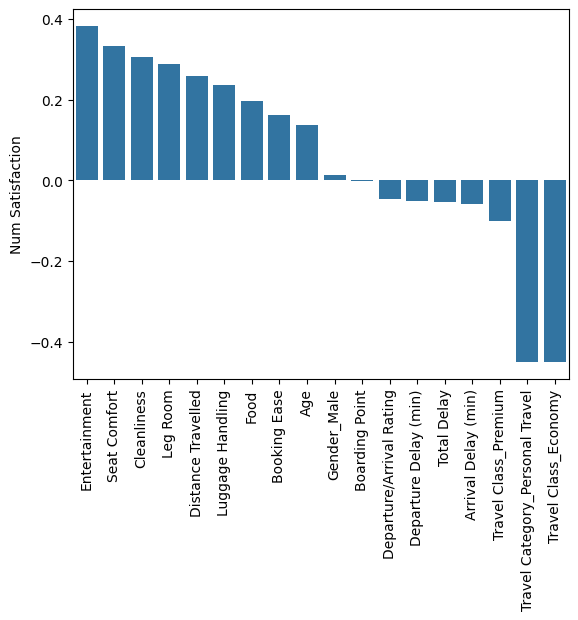

In [ ]:
plt.xticks(rotation=90)
sns.barplot(sorted_corr_for_satisfaction)

*Identify trends or outliersin the data.*

<Axes: xlabel='Distance Travelled', ylabel='Count'>

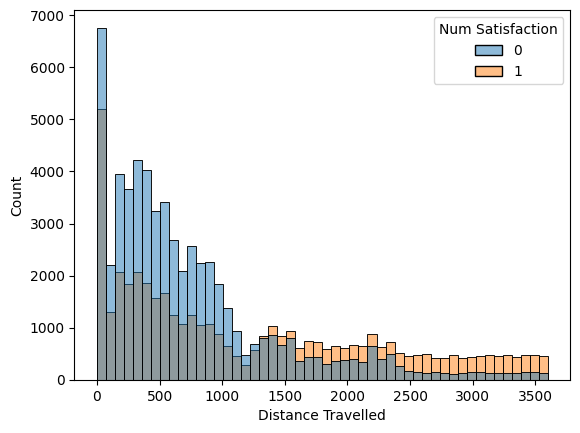

In [ ]:
sns.histplot(x='Distance Travelled', hue ='Num Satisfaction', data = df_for_corr, bins=50)

**Satisfied customer are more with shorter distance travelled and with longer route the unsatisfied customers are more**

<Axes: xlabel='Entertainment', ylabel='count'>

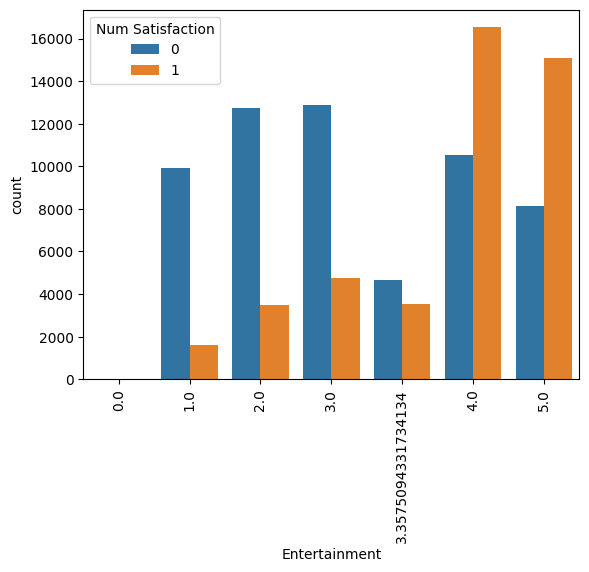

In [ ]:
plt.xticks(rotation = 90)
sns.countplot(x='Entertainment',data=df_for_corr,hue='Num Satisfaction')

**Customers are satisfied with with better Entertainment service**

In [ ]:
df_for_corr.columns

Index(['Age', 'Distance Travelled', 'Departure/Arrival Rating', 'Booking Ease',
       'Boarding Point', 'Food', 'Seat Comfort', 'Entertainment', 'Leg Room',
       'Luggage Handling', 'Cleanliness', 'Departure Delay (min)',
       'Arrival Delay (min)', 'Num Satisfaction', 'Gender_Male',
       'Travel Class_Economy', 'Travel Class_Premium',
       'Travel Category_Personal Travel', 'Total Delay'],
      dtype='object')

<Axes: xlabel='Travel Class_Economy', ylabel='count'>

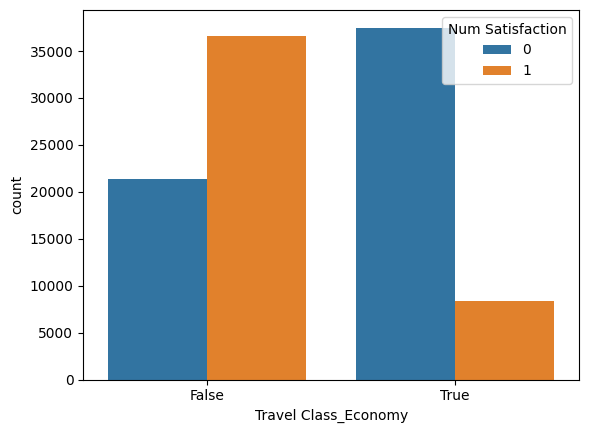

In [ ]:
sns.countplot(x='Travel Class_Economy',data=df_for_corr,hue='Num Satisfaction')

**The customers are more disatisifed, in economy travel class**

*5. Model Training*

*o Split the data into training and testing sets.*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=46)

In [ ]:
X_train.shape

(83080, 16)

In [ ]:
X_test.shape

(20770, 16)

o Train multiple models using different algorithms(e.g., Decision Tree, KNN etc.)

**1.   Logistic Regresssion**

**2.   K-Neigbors Classifier**

**3.   Decision Tree Classifier**

**4.   Random Forest classifier**

**5.   Naive Bayes Classifier**

**6.   Support Vector Machine Classifier**

**7.   PCA**

**8.   LDA with SVM**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
accuracy_report_indx= []
accuracy_report_value= []

In [ ]:
def print_report(x,y,z):
  dict_report = []
  print(f'          Confusion Matrix for ',z)
  print('------------------------')
  print(confusion_matrix(x,y))
  dict_report.append([z,classification_report(x,y,output_dict=True)])
  accuracy_report_indx.append(dict_report[0][0])
  accuracy_report_value.append(dict_report[0][1]['accuracy'])

In [ ]:
def classification_model(train_data,train_label,test_data,test_label,x,z):
  model = x
  model.fit(train_data,train_label)
  pred_labels=model.predict(test_data)
  print_report(test_label,pred_labels,z)

In [ ]:
classification_model(X_train,y_train,X_test,y_test,LogisticRegression(),'Logistic Regression')
classification_model(X_train,y_train,X_test,y_test,KNeighborsClassifier(),'KNeighbors')
classification_model(X_train,y_train,X_test,y_test,DecisionTreeClassifier(max_depth=7),'DecisionTree')
classification_model(X_train,y_train,X_test,y_test,RandomForestClassifier(),'Random Forest')
classification_model(X_train,y_train,X_test,y_test,GaussianNB(),'Naive Bayes')
classification_model(X_train,y_train,X_test,y_test,SVC(),'SVM')

          Confusion Matrix for  Logistic Regression
------------------------
[[10018  1741]
 [ 1944  7067]]
          Confusion Matrix for  KNeighbors
------------------------
[[10696  1063]
 [ 1583  7428]]
          Confusion Matrix for  DecisionTree
------------------------
[[10334  1425]
 [ 1318  7693]]
          Confusion Matrix for  Random Forest
------------------------
[[10890   869]
 [ 1198  7813]]
          Confusion Matrix for  Naive Bayes
------------------------
[[9517 2242]
 [1860 7151]]
          Confusion Matrix for  SVM
------------------------
[[10731  1028]
 [ 1342  7669]]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
print(X_pca.shape)
print(pca.explained_variance_)

(103850, 16)
[3.04306339 1.81298846 1.74160326 1.31550783 1.11709376 1.01301675
 0.99919345 0.98286824 0.82134064 0.66969102 0.57446064 0.50726862
 0.4630912  0.36209498 0.3094036  0.26746822]


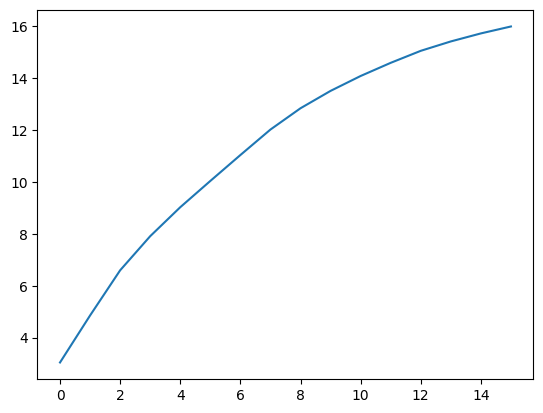

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_))

**There is no specific value with which we can reduce the components so PCA is not useful here**


**We can try with LDA and SVM**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
X_train_lda=lda.fit_transform(X_train,y_train)

In [ ]:
X_train_lda.shape

(83080, 1)

In [ ]:
X_test_lda=lda.transform(X_test)

In [ ]:
X_test_lda.shape

(20770, 1)

In [ ]:
classification_model(X_train_lda,y_train,X_test_lda,y_test,SVC(),'SVM with LDA')

          Confusion Matrix for  SVM with LDA
------------------------
[[10558  1201]
 [ 2563  6448]]


<Axes: >

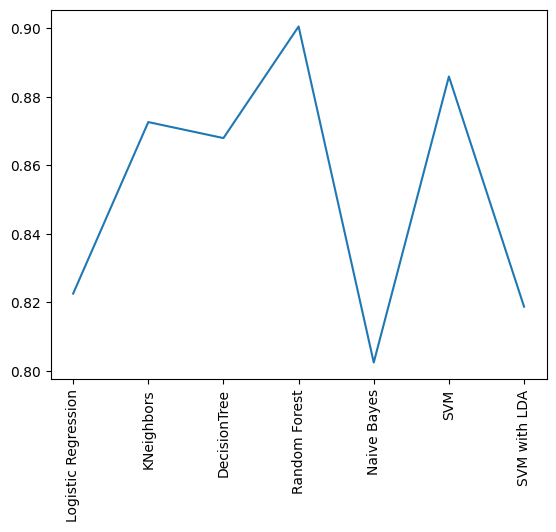

In [ ]:
plt.xticks(rotation=90)
sns.lineplot(x=accuracy_report_indx,y=accuracy_report_value)

**Comparing the confusion matrix, the *false positive&negative values* are lowest for Random Forest classifier and by comparing the accuracy the *RANDOM FOREST CLASSIFIER* seems to be a better model in predicting the satisfied customer.**

*7. Conclusion*

*Summarise findings from the analysis.*

**In the preprocessing steps we have scaled the data so that the mean value of all the features are approximately same and with this we have trained the models**

**Logistic Regression, KNeighbors, Decision Tree, Naive Bayes, Random Forest, SVM.**

**We tried to do feature reduction using PCA we plotted the values of "explained_variance_" but there was no significant impact in reducing the no of features. So we didnt proceed with PCA.**

**We tried LDA and we obtained the single feature data for X_test and X_train. We passed these values to SVM and tried predicting the o/p but the accuracy was not upto the mark comparing the other models.**

**We used the metrics, confusion matrix and classfication report. In that we observed that False positive and False negative was less for Random Forest which had the value of accuracy to *0.90* of the prediction**

**Logistic Regression was simpler but less accurate.**

**The model which took longer time for fit step which might have consumed more computational resources is *Support vector machine***

*Discuss the effectiveness of the chosen model and potential areas for improvement.*

**After conducting the analysis of multiple classification models, the evaluation revealed that Random Forest delivered the best overall performance, achieving the highest accuracy with balanced handling of precision and recall.**

**Compared to simpler models like Logistic Regression and even with high resource consuming model like SVM, *Random Forest Classifier*
demonstrated superior accuracy.**

**Despite its effectiveness, there are areas for improvement. We could do hyperparameter tuning to further optimize performance, implementing techniques like deep learning.**
